Objective: Given a Bank’s customer information, can we build a classifier which can determine whether they will leave or not?

Context: Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

Data Description: The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bankcustomer-churn-modeling

The points distribution for this case is as follows:
1. Read the dataset
2. Drop the columns which are unique for all users like IDs 
3. Distinguish the feature and target set 
4. Divide the data set into training and test sets 
5. Normalize the train and test data 
6. Initialize & build the model 
7. Predict the results using 0.5 as a threshold 

Print the Accuracy score and confusion matrix 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
## loading various libraries 

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
from google.colab import files
uploaded = files.upload()

## loading the file in colab from the local drive 

Saving Bank.csv to Bank.csv


In [0]:
bankchurn_df=pd.read_csv('Bank.csv')
## reading the dataset

In [59]:
bankchurn_df.head()

## viewing the dataset with the attributes / feature set and target variable 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
bankchurn_df=bankchurn_df.drop(['RowNumber','CustomerId'],axis=1)

## dropping the columns which are unique for all users like ID's

In [61]:
bankchurn_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [62]:
bankchurn_df.info()

## reading about the datatype . Surname , Geograpgy and Gender are object types . In subsequent steps we will be dropping surname while gender
## and geography will be converted to numeric variables for the purpose of our analysis 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [63]:
bankchurn_df.isnull().sum()
## checking for null values, the dataset does not have any null records 

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [64]:
bankchurn_df.shape
## checking the shape of the dataset

(10000, 12)

In [65]:
bankchurn_df.columns
## checking the unqiue columns in the dataset

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [66]:
bankchurn_df.groupby(['Exited']).count()
## checking the count of customers who have not exited and the one's who have exited. Exited field is the target variable 

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


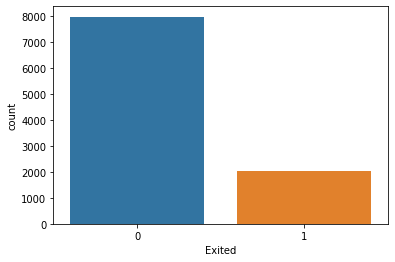

In [67]:
sns.countplot(x='Exited',data=bankchurn_df)

## visual representation of non-exited vs exited bank customers

In [68]:
bankchurn_df[bankchurn_df['Balance']==0]['Balance'].count()

## gathering details of the customers with zero balance to review if they have greater chances of exit

3617

In [0]:
le=LabelEncoder()

In [70]:
bankchurn_df['Geography']=le.fit_transform(bankchurn_df[['Geography']])

## converting geography variable into numeric values using label encoder 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
bankchurn_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
bankchurn_df['Gender']=le.fit_transform(bankchurn_df[['Gender']])

## converting gender variable into numeric values using label encoder 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
bankchurn_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [74]:
bankchurn_df['Geography'].unique()

array([0, 2, 1])

In [75]:
bankchurn_df['Gender'].unique()

array([0, 1])

In [76]:
bankchurn_df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [0]:
#sns.pairplot(bankchurn_df,diag_kind='kde')

In [0]:
X=bankchurn_df.drop(['Surname','Exited'],axis=1)
y=bankchurn_df['Exited']

In [0]:
test_size=.30
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

## splitting the data in test and train set for the purpose of analysis and model building 

In [0]:
scaler=StandardScaler()

## standadising the dataset using standard scaler

In [80]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
X_train_Scaler=scaler.transform(X_train)

In [0]:
X_test_Scaler=scaler.transform(X_test)

In [83]:
X_train_Scaler.shape

(7000, 10)

In [84]:
X_test_Scaler.shape

(3000, 10)

A hurestic tip is that the amount of nodes (dimensions) in our hidden layer should be the average of your input and output layers, which means that since we have 11 dimensions (representing Independent variables) and we are looking for a binary output, we calculate this to be 
(11+1)÷2=6

Adding the output layer
The breakdown of the inputs for the output layer is as follows:
activiation: sigmoid becasue we are in an output layer. This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank or not.

In [85]:
model=Sequential()
model.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu', input_dim = 10))  
model.add(Dropout(rate=.01))
model.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu'))
model.add(Dropout(rate=.01))
model.add(Dense(1,init = 'uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 66        
_________________________________________________________________
dropout_7 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_8 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


Compiling the Neural Network

Basically applying Stochastic Gradient descent on the whole Neural Network. We are Tuning the individual weights on each neuron.
The breakdown of the inputs for compiling is as follows:
optimizer: adam The algorithm we want to use to find the optimal set of weights in the neural networks. Adam is a very efficeint variation of Stochastic Gradient Descent.

loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

metrics: [accuracy] The accuracy metrics which will be evaluated(minimized) by the model. Used as accuracy criteria to imporve model performance.

In [87]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_Scaler, y_train, batch_size = 10, epochs= 20)
#model.fit(X_train_Scaler,y_train,epochs=10,batch_size=512,callbacks=[model.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
                                   #validation_data=(X_test_Scaler, y_test))

## printing the accuracy scores 

Epoch 1/20
7000/7000 [==============================] - 3s 393us/step - loss: 0.5062 - acc: 0.7949
Epoch 2/20
7000/7000 [==============================] - 2s 341us/step - loss: 0.4318 - acc: 0.7953
Epoch 3/20
7000/7000 [==============================] - 2s 346us/step - loss: 0.4227 - acc: 0.8179
Epoch 4/20
7000/7000 [==============================] - 2s 355us/step - loss: 0.4173 - acc: 0.8287
Epoch 5/20
7000/7000 [==============================] - 2s 350us/step - loss: 0.4134 - acc: 0.8329
Epoch 6/20
7000/7000 [==============================] - 2s 340us/step - loss: 0.4106 - acc: 0.8337
Epoch 7/20
7000/7000 [==============================] - 3s 359us/step - loss: 0.4089 - acc: 0.8343
Epoch 8/20
7000/7000 [==============================] - 2s 352us/step - loss: 0.4072 - acc: 0.8334
Epoch 9/20
7000/7000 [==============================] - 2s 343us/step - loss: 0.4076 - acc: 0.8350
Epoch 10/20
7000/7000 [==============================] - 2s 349us/step - loss: 0.4058 - acc: 0.8350
Epoch 11/

In [88]:
model.evaluate(X_test_Scaler,y_test,batch_size = 10)

## checking the accuracy scores on test data 

3000/3000 [==============================] - 0s 165us/step


[0.4014109372844299, 0.8363333294788996]

In [0]:
y_predict=model.predict(X_test_Scaler)

## making predictions on the test data 

In [90]:
y_predict

array([[0.1216327 ],
       [0.13433027],
       [0.08116925],
       ...,
       [0.02089512],
       [0.05978814],
       [0.08487472]], dtype=float32)

In [0]:
y_predict=y_predict>.5

## predicting the results on test data using .5 as treshold limit to classify the probability into true or false

In [56]:
y_predict

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [92]:
confusion_matrix(y_test,y_predict)

## printing the confusion matrix on test data 

array([[2314,   81],
       [ 410,  195]])

In [0]:
## this means that we have (2314+195) correct classifications out of test data of 3000. 2509/3000=83.63% 

In [0]:
y_predict_train=model.predict(X_train_Scaler)

In [94]:
y_predict_train

array([[0.15035543],
       [0.10023582],
       [0.8128818 ],
       ...,
       [0.08702573],
       [0.11865273],
       [0.04080018]], dtype=float32)

In [0]:
y_predict_train=y_predict_train>.5

## predicting the results on train data using .5 as treshold limit to classify the probability into true or false

In [96]:
confusion_matrix(y_train,y_predict_train)

## printing the connfusion matrix on train data

array([[5423,  145],
       [ 975,  457]])

In [0]:
## this means that we have (5423+457) correct classifications out of train data of 7000. 5880/7000=84% 

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2395
           1       0.71      0.32      0.44       605

    accuracy                           0.84      3000
   macro avg       0.78      0.64      0.67      3000
weighted avg       0.82      0.84      0.81      3000



In [99]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      5568
           1       0.76      0.32      0.45      1432

    accuracy                           0.84      7000
   macro avg       0.80      0.65      0.68      7000
weighted avg       0.83      0.84      0.81      7000



In [0]:
## our data is highly imbalanced for non exited and exited customers of the bank. The precision and recall of the low represented class
## (exited customers) is not good and the results are skewed in favor of the high represented class (non-exited target class of customers)
## In this case model has trained better on high reprsented class and predictions on that class are better as compared to that on test data for 
## exited customers 